<a href="https://colab.research.google.com/github/Mirucla/Applied-Data-Management/blob/main/Inclass_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


# 1) Import US perm Visas csv from CCLE using zip extractor

In [3]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/MyDrive/us_perm_visas.csv.zip','r') as zip_object:
  zip_object.extractall()
  zip_object.extract('us_perm_visas.csv')

In [4]:
df=pd.read_csv('us_perm_visas.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.shape

(374362, 154)

In [6]:
df.tail(100)

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
374262,NaN,Herndon,LAW OFFICES OF JANETHA R. KANCHARLA,VA,NaN,NaN,A-16292-62620,2016-10-18,Certified,H-1B,...,NaN,NaN,N,NaN,"88,878.00","88,878.00",Year,NaN,NaN,NaN
374263,NaN,San Diego,Law Office of Peter D. Chu,CA,NaN,NaN,A-16291-62562,2016-10-18,Certified,H-1B,...,2016-08-12,NaN,N,NaN,"114,587.00",NaN,Year,NaN,NaN,NaN
374264,NaN,Santa Clara,"Fragomen, Del Rey, Bernsen & Loewy, LLP",CA,NaN,NaN,A-16291-62588,2016-10-18,Certified,L-1,...,NaN,A,N,NaN,"105,000.00",NaN,Year,NaN,NaN,NaN
374265,NaN,Bloomfield Hills,LAW OFFICE OF RAJAGURU NALLIAH INC.,MI,NaN,NaN,A-16291-62457,2016-10-18,Certified,H-1B,...,NaN,NaN,N,NaN,"79,539.00",NaN,Year,NaN,NaN,NaN
374266,NaN,Washington,"Immigration Law Group, P.C.",DC,NaN,NaN,A-16292-62644,2016-10-18,Certified,F-1,...,NaN,NaN,N,NaN,"50,000.00",NaN,Year,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN


# 2) Choose 4 features you think are important. Case_status is your target variable

In [7]:
df2=df[['agent_city','agent_state','agent_firm_name', 'class_of_admission','case_status']]

In [8]:
df2.head(100)

,agent_city,agent_state,agent_firm_name,class_of_admission,case_status
0,NaN,NaN,NaN,J-1,Certified
1,NaN,NaN,NaN,B-2,Denied
2,NaN,NaN,NaN,H-1B,Certified
3,NaN,NaN,NaN,B-2,Certified
4,NaN,NaN,NaN,L-1,Certified
...,...,...,...,...,...
95,NaN,NaN,NaN,F-1,Denied
96,NaN,NaN,NaN,NaN,Denied
97,NaN,NaN,NaN,B-1,Denied
98,NaN,NaN,NaN,H-1B,Certified


# 3) Clean your data for a decision tree

In [9]:
df2.isnull().sum()

agent_city            162908
agent_state           166123
agent_firm_name       167365
class_of_admission     22845
case_status                0
dtype: int64

In [10]:
df2.tail(500)

,agent_city,agent_state,agent_firm_name,class_of_admission,case_status
373862,NEW YORK,NY,Law Offices of Peng Fang,H-1B,Certified
373863,East Bruswick,NJ,Law Offices of Weicheng Wang,H-1B,Certified
373864,South San Francisco,CA,Litwin and Smith,H-1B,Certified
373865,Duluth,GA,"Staffing Post, LLC",NaN,Certified
373866,Dallas,TX,Berry Appleman & Leiden LLP,H-1B,Certified
...,...,...,...,...,...
374357,Buena Park,CA,Law Offices of Yohan Lee,NaN,Withdrawn
374358,Seattle,WA,MacDonald Hoague & Bayless,L-1,Withdrawn
374359,Schaumburg,IL,International Legal and Business Services Grou...,H-1B,Withdrawn
374360,LOS ANGELES,CA,LAW OFFICES OF JAMES S HONG,B-2,Withdrawn


In [11]:
df2.dropna(how='any', inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
df2.head()

,agent_city,agent_state,agent_firm_name,class_of_admission,case_status
135269,Milwaukee,WISCONSIN,Reinhart Boerner Van Deuren s.c.,H-1B,Certified
135271,Littleton,COLORADO,Law Office of Jonathan Chin,H-1B,Denied
135272,Los Angeles,CALIFORNIA,Law Offices Peter A. Kim,E-2,Certified
135274,Ann Arbor,MICHIGAN,"Law Office of Soo Park, PLC",F-1,Certified
135275,Williamsville,NEW YORK,Cumming & Partners,H-1B,Certified-Expired


In [13]:
df2.shape

(191934, 5)

In [14]:
inputs=df2.drop('case_status', axis='columns')
inputs.head()

,agent_city,agent_state,agent_firm_name,class_of_admission
135269,Milwaukee,WISCONSIN,Reinhart Boerner Van Deuren s.c.,H-1B
135271,Littleton,COLORADO,Law Office of Jonathan Chin,H-1B
135272,Los Angeles,CALIFORNIA,Law Offices Peter A. Kim,E-2
135274,Ann Arbor,MICHIGAN,"Law Office of Soo Park, PLC",F-1
135275,Williamsville,NEW YORK,Cumming & Partners,H-1B


In [15]:
target=df2['case_status']

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
e_agent_city=LabelEncoder()
e_agent_state=LabelEncoder()
e_agent_firm_name=LabelEncoder()
e_class_of_admission=LabelEncoder()

In [18]:
inputs['agent_city_e']=e_agent_city.fit_transform(inputs['agent_city'])

In [19]:
inputs['agent_state_e']=e_agent_state.fit_transform(inputs['agent_state'])
inputs['agent_firm_name_e']=e_agent_firm_name.fit_transform(inputs['agent_firm_name'])
inputs['class_of_admission_e']=e_class_of_admission.fit_transform(inputs['class_of_admission'])

In [20]:
inputs.head(10)

,agent_city,agent_state,agent_firm_name,class_of_admission,agent_city_e,agent_state_e,agent_firm_name_e,class_of_admission_e
135269,Milwaukee,WISCONSIN,Reinhart Boerner Van Deuren s.c.,H-1B,883,105,7374,17
135271,Littleton,COLORADO,Law Office of Jonathan Chin,H-1B,764,11,4517,17
135272,Los Angeles,CALIFORNIA,Law Offices Peter A. Kim,E-2,777,9,4965,8
135274,Ann Arbor,MICHIGAN,"Law Office of Soo Park, PLC",F-1,54,48,4833,11
135275,Williamsville,NEW YORK,Cumming & Partners,H-1B,1550,66,1218,17
135281,Enola,PENNSYLVANIA,"Law Offices of Kendra S. Elliott, Esq.",H-1B,428,81,5402,17
135285,PLAINSBORO,NEW JERSEY,"KHAVINSON & ASSOCIATES, P.C.",L-1,1086,64,3232,26
135286,Edison,NEW JERSEY,"Law Office of Thomas V. Allen, PLLC",H-1B,410,64,4868,17
135287,South San Francisco,CALIFORNIA,Litwin & Associates,H-1B,1353,9,6030,17
135289,Dallas,TEXAS,Berry Appleman & Leiden LLP,H-1B,351,91,653,17


In [21]:
F_Inputs=inputs.drop(['agent_city','agent_state', 'agent_firm_name', 'class_of_admission'], axis='columns')

In [22]:
F_Inputs.head()

,agent_city_e,agent_state_e,agent_firm_name_e,class_of_admission_e
135269,883,105,7374,17
135271,764,11,4517,17
135272,777,9,4965,8
135274,54,48,4833,11
135275,1550,66,1218,17


# 4) Fit and plot a decision tree of depth 3

In [23]:
from sklearn import tree

In [24]:
mod=tree.DecisionTreeClassifier(max_depth=3)

In [25]:
mod.fit(F_Inputs, target)

DecisionTreeClassifier(max_depth=3)

In [26]:
mod.score(F_Inputs, target)

0.5163962612147925

[Text(0.5, 0.875, 'class_of_admission <= 13.5\ngini = 0.569\nsamples = 191934\nvalue = [99082, 77169, 8236, 7447]'),
 Text(0.25, 0.625, 'class_of_admission <= 10.5\ngini = 0.615\nsamples = 17320\nvalue = [8813, 5828, 1777, 902]'),
 Text(0.125, 0.375, 'class_of_admission <= 9.5\ngini = 0.646\nsamples = 6647\nvalue = [3109, 2197, 1030, 311]'),
 Text(0.0625, 0.125, 'gini = 0.629\nsamples = 5747\nvalue = [2838, 1894, 735, 280]'),
 Text(0.1875, 0.125, 'gini = 0.687\nsamples = 900\nvalue = [271, 303, 295, 31]'),
 Text(0.375, 0.375, 'agent_state <= 7.5\ngini = 0.591\nsamples = 10673\nvalue = [5704, 3631, 747, 591]'),
 Text(0.3125, 0.125, 'gini = 0.537\nsamples = 1598\nvalue = [967, 486, 67, 78]'),
 Text(0.4375, 0.125, 'gini = 0.599\nsamples = 9075\nvalue = [4737, 3145, 680, 513]'),
 Text(0.75, 0.625, 'class_of_admission <= 26.5\ngini = 0.563\nsamples = 174614\nvalue = [90269, 71341, 6459, 6545]'),
 Text(0.625, 0.375, 'agent_state <= 8.5\ngini = 0.56\nsamples = 163870\nvalue = [84653, 67793, 5

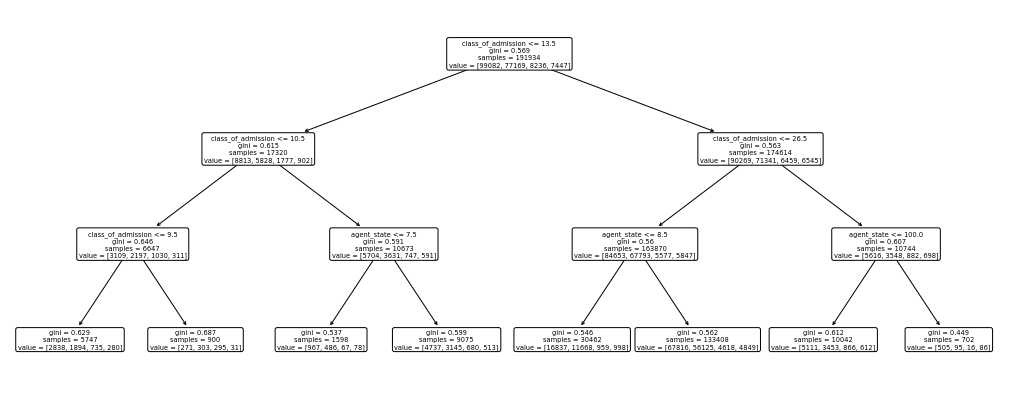

In [27]:
plt.figure(figsize=(18,7))
tree.plot_tree(mod,max_depth=3, rounded=True, feature_names=df2.columns)

# 5) Write your interpretation of the largest (by sample size) leaf node

 #The largest sample leaf node is 133408 which is for agent_state and 
 #it has a gini score of 0.562. This gini score is the highest among all the leaf nodes when we use the max_depth=3. 
 #The lowest gini score is the one we look for to have the best outcome. In contrast, this one has the highest gini score with the highest number of samples. Here the gini is not homogeneous. 

# 6) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [28]:
Y=target

In [29]:
Y.head()

135269            Certified
135271               Denied
135272            Certified
135274            Certified
135275    Certified-Expired
Name: case_status, dtype: object

In [30]:
X=F_Inputs

In [31]:
for seed in range(100):
  X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=.3, random_state=seed)

In [32]:
mod=tree.DecisionTreeClassifier()

In [33]:
mod.fit(X_train, Y_train)

DecisionTreeClassifier()

In [36]:
mod.predict(X_test)

array(['Certified', 'Certified-Expired', 'Certified', ..., 'Certified',
       'Certified', 'Certified'], dtype=object)

In [37]:
mod.score(X_test, Y_test)

0.564526493114048

In [51]:
from sklearn.model_selection import GridSearchCV
params={'max_depth':[None, 6,7,8,9,10,11,14,15,70,200,2000,3000,6000]}
mod=tree.DecisionTreeClassifier()
grid=GridSearchCV(mod, params, scoring='accuracy', cv=10)
grid.fit(X_train, Y_train)
grid.best_params_

{'max_depth': 3000}

As per GridSearch, max_depth is 3000 for out of samply accuracy. Our training error will go down with this max_depth. 

In [52]:
grid.best_score_

0.5630465331351274